In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_rel

%matplotlib inline

In [3]:
xl = pd.ExcelFile("C:/computer_harddrive/2017_oceanus/hplc/summary.xlsx")
df = xl.parse("data")
df.head()

,Number,Date,Station,Other,Notes,Volume (L),Chl c3,Chl c1c2,perid,but,...,chlb,Chla Allomer,Chl a,Chla prime,α Carotene,β Carotene,Unnamed: 28,Chl-ide a,chla,ALL Chl a
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,stn 1 c1,0.0,0.0,1.06,0.022216,0.833268,0.063756,0.085436,...,0.083534,0.000000,0.632687,0.022636,0.000000,0.000000,NaN,1.287548e-17,0.632687,0.655323
2,2.0,0.0,stn 2 c3,0.0,0.0,1.06,0.037908,1.171535,0.062565,0.099732,...,0.107637,0.000000,0.749088,0.022885,0.000000,0.000000,NaN,1.480524e-17,0.749088,0.771973
3,3.0,0.0,stn 3 c4,0.0,0.0,2.08,0.012170,0.317775,0.014224,0.029110,...,0.023954,0.000000,0.289944,0.000000,0.000000,0.000000,NaN,7.685357e-18,0.289944,0.289944
4,4.0,0.0,stn 4 c5 rep a,0.0,0.0,1.06,0.070184,2.361643,0.086939,0.031125,...,0.237193,0.076206,2.411959,0.069237,0.143353,0.125439,NaN,1.129688e-17,2.411959,2.557402


In [4]:
df['micro_chl'] = 1./ (0.9117 + np.exp (-2.7330*np.log10(df['Chla']) + 0.4003))
df['diatom_chl'] = 1./ (1.3272 + np.exp (-3.9828*np.log10(df['Chla']) + 0.1953)) 
df['dino_chl'] = df['micro_chl']-df['diatom_chl']

df['pico_chl'] = (-1./ (0.1529 + np.exp (1.0306* np.log10(df['Chla']) 
                                         - 1.5576)) - 1.8597*np.log10(df['Chla']) +2.9954)
df['prokaryotes_chl'] = ((0.0067/0.6154/df['Chla'])*np.exp(-19.5190*((np.log10(df['Chla']) + 0.9643)**2)/(0.0067**2)) 
                  + 0.1027*(np.log10(df['Chla'])**2) -0.1189*np.log10(df['Chla']) +0.0626)
df['picoeukaryotes_chl'] = df['pico_chl']-df['prokaryotes_chl']
                  
df['nano_chl'] = 1-df['pico_chl']-df['micro_chl']
df['greenalgae_chl'] = (0.2490/df['Chla']) * np.exp(-1.2621*(np.log10(df['Chla'])-0.5523)**2)
df['prymnesiophytes_chl'] = df['nano_chl']-df['greenalgae_chl']

KeyError: 'Chla'

In [4]:
df['micro']=(1.41*df['Fuco']+1.41*df['Perid'])/df['DP']
df['diatom']=(1.41*df['Fuco'])/df['DP']
df['dino']=(1.41*df['Perid'])/df['DP']

df['nano']=(0.5*1.27*df['Hexx']+0.6*df['Allo']+0.35*df['But']+1.01*df['Chlb']
              )/df['DP']
df['green_algae']=(1.01*df['Chlb'])/df['DP']
df['prymn']=(0.5*1.27*df['Hexx']+0.35*df['But'])/df['DP']

df['pico']=(0.5*1.27*df['Hexx']+0.86*df['Zea'])/df['DP']
df['prokary']=(0.86*df['Zea'])/df['DP']
df['pico_eu']=(0.5*1.27*df['Hexx'])/df['DP']

KeyError: 'Fuco'

In [7]:
writer = pd.ExcelWriter('C:/computer_harddrive/2017_oceanus/hplc/output.xlsx')
df.to_excel(writer,'Sheet1')
writer.save()

In [6]:
df['dp']=1.41*df['fuco']+1.41*df['perid']+1.27*df['hexx']+0.6*df['allo']+0.35*df['but']+1.01*df['chlb']+0.86*df['zea']

df['micro']=(1.41*df['fuco']+1.41*df['perid'])/df['dp']
df['diatom']=(1.41*df['fuco'])/df['dp']
df['dino']=(1.41*df['perid'])/df['dp']

df['nano']=(0.5*1.27*df['hexx']+0.6*df['allo']+0.35*df['but']+1.01*df['chlb']
              )/df['dp']
df['green_algae']=(1.01*df['chlb'])/df['dp']
df['prymn']=(0.5*1.27*df['hexx']+0.35*df['but'])/df['dp']

df['pico']=(0.5*1.27*df['hexx']+0.86*df['zea'])/df['dp']
df['prokary']=(0.86*df['zea'])/df['dp']
df['pico_eu']=(0.5*1.27*df['hexx'])/df['dp']

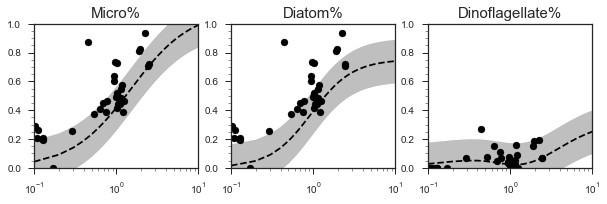

In [8]:
# plot scatter for Micro%
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 9))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 100, 0.1)
x = np.log10(y)
micro = 1./ (0.9117 + np.exp (-2.7330* x + 0.4003)) #Micro
diatom = 1./ (1.3272 + np.exp (-3.9828* x + 0.1953)) #Diatom
dino = micro - diatom #Dino

#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, micro-0.15, micro+0.15, color='grey', alpha=0.5)
plt.plot(y, micro, "r--",c='black')#, label='chl-based Micro%'
plt.scatter(df['chla'],df['micro'],c='black',edgecolors='black')
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Micro%', size=15) # title of plot

ax= fig.add_subplot(332) 
plt.fill_between(y, diatom-0.15, diatom+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['micro'],c='black',edgecolors='black')
plt.plot(y, diatom, "r--",c='black')#, label='chl-based Diatom%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='lower right')#[sc, pt]
plt.minorticks_on()
ax.set_title('Diatom%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, dino-0.15, dino+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'],df['dino'], c='black',edgecolors='black') #
plt.plot(y, dino, "r--", c='black') #, label='chl-based Dinoflagellate%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Dinoflagellate%',size=15)

plt.show()

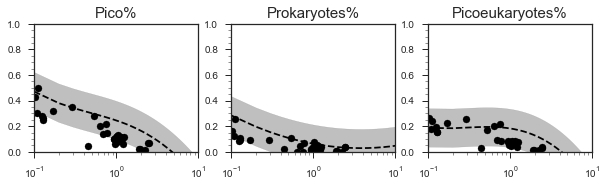

In [10]:
# plot scatter for Pico
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 8))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 100, 0.1)
x = np.log10(y)
pico = -1./ (0.1529 + np.exp (1.0306* x - 1.5576)) - 1.8597*x +2.9954
prokaryotes = (0.0067/0.6154/y)*np.exp(-19.5190*((x + 0.9643)**2)/(0.0067**2)) + 0.1027*(x**2) \
    -0.1189*x +0.0626
picoeukaryotes = pico - prokaryotes
    
#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, pico-0.15, pico+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['pico'],
            c='black',edgecolors='black')
plt.plot(y, pico, "r--",c='black')#, label='chl-based Pico%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Pico%',size=15)

ax = fig.add_subplot(332) 
plt.fill_between(y, prokaryotes-0.15, prokaryotes+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['prokary'],c='black',edgecolors='black')
plt.plot(y, prokaryotes, "r--",c='black')#, label='chl-based Prokaryotes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Prokaryotes%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, picoeukaryotes-0.15, picoeukaryotes+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['pico_eu'],c='black',edgecolors='black')
plt.plot(y, picoeukaryotes, "r--",c='black')#, label='chl-based Picoeukaryotes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Picoeukaryotes%',size=15)

plt.show()

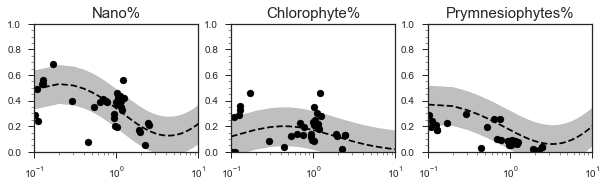

In [11]:
# plot scatter for Nano
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 8))

# Hirata's model[[Fuco][Perid][Hex fuco][Allo][But fuco][Tot_Chl_b][Zea]]
y = np.arange(0.1, 100, 0.1)
x = np.log10(y)
nano = 1 - micro - pico
greenalgae = (0.2490/y) * np.exp(-1.2621*(x-0.5523)**2)
prymnesiophytes = nano - greenalgae
    
#plot in subplots
ax = fig.add_subplot(331) 
plt.fill_between(y, nano-0.15, nano+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['nano'],c='black',edgecolors='black')
plt.plot(y, nano, "r--",c='black')#, label='chl-based Nano%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Nano%',size=15)

ax = fig.add_subplot(332) 
plt.fill_between(y, greenalgae-0.15, greenalgae+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['green_algae'],c='black',edgecolors='black')
plt.plot(y, greenalgae, "r--",c='black')#, label='chl-based Green algae%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Chlorophyte%',size=15)

ax = fig.add_subplot(333) 
plt.fill_between(y, prymnesiophytes-0.15, prymnesiophytes+0.15, color='grey', alpha=0.5)
plt.scatter(df['chla'], df['prymn'], c='black',edgecolors='black')
plt.plot(y, prymnesiophytes, "r--",c='black')#, label='chl-based Prymnesiophytes%'
plt.xscale('log')
plt.ylim([0, 1])
plt.xlim([0.1, 10])
#plt.legend(loc='upper left')#[sc, pt]
plt.minorticks_on()
ax.set_title('Prymnesiophytes%',size=15)

plt.show()